In [33]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# import evluation matrix for regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import train_test_split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Import Lasso Model from sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime

In [34]:
# load training dataset
data = pd.read_csv('data.csv')

In [35]:
# split training and testing dataset
features = list(data.columns[1:96])
X = data[features]
y = data['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

features

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [36]:
# Define model to be Lasso, set alpha=0.005 (alpha is the regularization parameter)
# Define model to be Ridge, set alpha=0.005 (alpha is the regularization parameter)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
alpha_l1 = 0.5
alpha_l2 = 0.5
lasso = Lasso(alpha = alpha_l1)
ridge = Ridge(alpha = alpha_l2)

In [37]:
score_lasso = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
score_ridge = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44301e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.53619e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.42578e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44536e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.

In [38]:
lasso = lasso.fit(X_train,y_train)
ridge = ridge.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.13709e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [39]:
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

In [40]:
R2 = r2_score(y_test, lasso_pred)
MAE = mean_absolute_error(y_test, lasso_pred)
MSE = mean_squared_error(y_test, lasso_pred)
print ("Lasso result")
print (R2)
print (MAE)
print (MSE)

Lasso result
-0.002146666426057653
0.060760272998820045
0.02806531403934483


In [41]:
R2 = r2_score(y_test, ridge_pred)
MAE = mean_absolute_error(y_test, ridge_pred)
MSE = mean_squared_error(y_test, ridge_pred)
print ("ridge result")
print (R2)
print (MAE)
print (MSE)

ridge result
0.13277438408570708
0.06719045391510517
0.024286823544899448


In [42]:
# train model using whole dataset
lasso.fit(X, y)
ridge.fit(X,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.1964e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [43]:
# show the intercept of the trained model (Theta_0)
print(lasso.intercept_)

# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df

0.04224149727377109


,Coefficient
ROA(C) before interest and depreciation before interest,-0.0
ROA(A) before interest and % after tax,-0.0
ROA(B) before interest and depreciation after tax,-0.0
Operating Gross Margin,-0.0
Realized Sales Gross Margin,-0.0
...,...
Liability to Equity,0.0
Degree of Financial Leverage (DFL),0.0
Interest Coverage Ratio (Interest expense to EBIT),-0.0
Net Income Flag,0.0


In [44]:
# show the intercept of the trained model (Theta_0)
print(ridge.intercept_)

# show the coefficients of independent attributes
coeff_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
coeff_df

0.7880007079512432


,Coefficient
ROA(C) before interest and depreciation before interest,0.300013
ROA(A) before interest and % after tax,0.338594
ROA(B) before interest and depreciation after tax,-0.516030
Operating Gross Margin,-0.018383
Realized Sales Gross Margin,-0.015230
...,...
Liability to Equity,0.158975
Degree of Financial Leverage (DFL),0.031587
Interest Coverage Ratio (Interest expense to EBIT),-0.027547
Net Income Flag,0.000000


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (95).

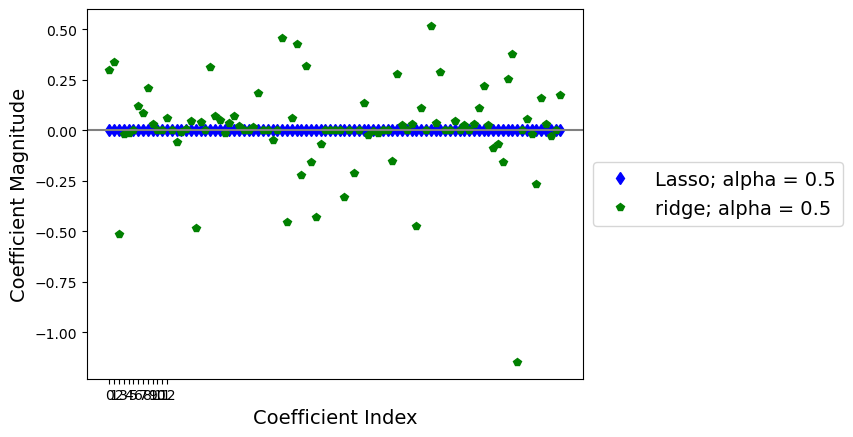

In [46]:
plt.plot(lasso.coef_,linestyle='none',marker='d',markersize=6,color='blue',label=f'Lasso; alpha = {alpha_l1}')

plt.plot(ridge.coef_,linestyle='none',marker='p',markersize=6,color='green',label=f'ridge; alpha = {alpha_l2}')

# draw a horizontal line at 0.
plt.axhline(y=0, color='grey', linestyle='-')

plt.xlabel('Coefficient Index',fontsize=14)
plt.ylabel('Coefficient Magnitude',fontsize=14)
#plt.legend(fontsize=13,loc=10)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(13), (features), fontsize=10)
plt.show()